# EBC Feedback Sentiment Analysis CPU

# Imports & Constants

In [62]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [63]:
DATA_FILE_PATH = 'C:\\Users\\Yostina\\SentimentNLP\\'
DATA_FILE_NAME = 'data.csv'
SAVE_FILE = True
CLEAN_EMPTY_FILE_NAME = 'empty_feedback_data.csv'
CLEAN_DATA_FILE_NAME = 'clean_feedback_data.csv'


# Read Data File

In [64]:
df = pd.read_csv(DATA_FILE_PATH+DATA_FILE_NAME,encoding="utf-8" )
#df = pd.read_csv(DATA_FILE_PATH+DATA_FILE_NAME )

# Initial Review of Data

In [65]:
df.head()

,id,Region,Sex,Age,Edu_Level,Feedback,Fb_Day,Fb_Month,Fb_Year
0,1,Debub,M,50,Cert,ኢቲቪ ሰራተኞች በሙሉ እንኳን ለገና በዓል በሰላም አደረሳችሁ፡፡,1,1,2008.0
1,2,NaN,NaN,NaN,Cert,መንግስት በአገራችን በደረሰው የተለያዩ ችግሮች ላይ እየወሰደ ያለው እርምጃ በጣም ጥሩ ነው በዚሁ ይቀጥል፡፡,1,1,NaN
2,3,NaN,NaN,NaN,Cert,ኢቲቪ ደግሞ በዜና በወቅታዊ ጉዳዮች ላይ እውነት ለመናገር በጣም ጥሩ እየሰራችሁ ነው በርቱ፡፡,1,1,NaN
3,4,NaN,NaN,NaN,Cert,ኢቲቪ ቢሰራ የምንለው ህዝቡ ስሩን የሰደደው የህዋት አስተዳደር አሁንም ባሉት አመራሮች እየተተገበረ ስለሆነ ወደታች ወርዳችሁ ብትሰሩ የበለጠ ተሰሚ ትሆናለችሁ አገርንም በሰላም ታስቀጥላላችሁ ሀላፊነታችሁን ተወጡ፡፡,1,1,NaN
4,5,NaN,NaN,30,Sec. Sc,ኢቲቪ ዜና 57 ላይ የሚቀርቡት ወቅታዊ ዜናዎች በሀገርና በውጭ በጣም ጥሩ መረጃ እያገኝን ነው፡፡,1,1,NaN


In [66]:
df.set_index('id', inplace=True)

In [67]:
df2 = df.fillna(method='ffill')

In [68]:
df2.head()

,Region,Sex,Age,Edu_Level,Feedback,Fb_Day,Fb_Month,Fb_Year
id,,,,,,,,
1,Debub,M,50,Cert,ኢቲቪ ሰራተኞች በሙሉ እንኳን ለገና በዓል በሰላም አደረሳችሁ፡፡,1,1,2008.0
2,Debub,M,50,Cert,መንግስት በአገራችን በደረሰው የተለያዩ ችግሮች ላይ እየወሰደ ያለው እርምጃ በጣም ጥሩ ነው በዚሁ ይቀጥል፡፡,1,1,2008.0
3,Debub,M,50,Cert,ኢቲቪ ደግሞ በዜና በወቅታዊ ጉዳዮች ላይ እውነት ለመናገር በጣም ጥሩ እየሰራችሁ ነው በርቱ፡፡,1,1,2008.0
4,Debub,M,50,Cert,ኢቲቪ ቢሰራ የምንለው ህዝቡ ስሩን የሰደደው የህዋት አስተዳደር አሁንም ባሉት አመራሮች እየተተገበረ ስለሆነ ወደታች ወርዳችሁ ብትሰሩ የበለጠ ተሰሚ ትሆናለችሁ አገርንም በሰላም ታስቀጥላላችሁ ሀላፊነታችሁን ተወጡ፡፡,1,1,2008.0
5,Debub,M,30,Sec. Sc,ኢቲቪ ዜና 57 ላይ የሚቀርቡት ወቅታዊ ዜናዎች በሀገርና በውጭ በጣም ጥሩ መረጃ እያገኝን ነው፡፡,1,1,2008.0


In [69]:
df3 = df2.interpolate()

In [70]:
df3.to_csv(DATA_FILE_PATH + CLEAN_EMPTY_FILE_NAME, index=False,encoding='utf-8')

In [71]:
df3.head()

,Region,Sex,Age,Edu_Level,Feedback,Fb_Day,Fb_Month,Fb_Year
id,,,,,,,,
1,Debub,M,50,Cert,ኢቲቪ ሰራተኞች በሙሉ እንኳን ለገና በዓል በሰላም አደረሳችሁ፡፡,1,1,2008.0
2,Debub,M,50,Cert,መንግስት በአገራችን በደረሰው የተለያዩ ችግሮች ላይ እየወሰደ ያለው እርምጃ በጣም ጥሩ ነው በዚሁ ይቀጥል፡፡,1,1,2008.0
3,Debub,M,50,Cert,ኢቲቪ ደግሞ በዜና በወቅታዊ ጉዳዮች ላይ እውነት ለመናገር በጣም ጥሩ እየሰራችሁ ነው በርቱ፡፡,1,1,2008.0
4,Debub,M,50,Cert,ኢቲቪ ቢሰራ የምንለው ህዝቡ ስሩን የሰደደው የህዋት አስተዳደር አሁንም ባሉት አመራሮች እየተተገበረ ስለሆነ ወደታች ወርዳችሁ ብትሰሩ የበለጠ ተሰሚ ትሆናለችሁ አገርንም በሰላም ታስቀጥላላችሁ ሀላፊነታችሁን ተወጡ፡፡,1,1,2008.0
5,Debub,M,30,Sec. Sc,ኢቲቪ ዜና 57 ላይ የሚቀርቡት ወቅታዊ ዜናዎች በሀገርና በውጭ በጣም ጥሩ መረጃ እያገኝን ነው፡፡,1,1,2008.0


## Clean Data

* Delete the line with no feedback
* df_clean.tweet_text = df_clean.Feedback.apply(lambda x: re.sub("@[A-Za-z0-9]+", "", x))
* Delete the lines where ፕ/ት = "ፕሬዚዳንት'
* Delete the lines where ጠ/ሚ = "ጠቅላይ ሚኒስትር'
* Replace previos value for empty cell
    * Some data will be lost because of this, but protecting the privacy of any individuals mentioned in the tweets is more important

In [72]:
df_clean = pd.read_csv(DATA_FILE_PATH+CLEAN_EMPTY_FILE_NAME,encoding="utf-8" )

In [73]:


df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub("@[A-Za-z0-9]+", "", x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub("ፕ/ት", "ፕሬዚዳንት", x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub("ጠ/ም", "ጠቅላይ ሚኒስትር", x))



df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ሀሃሐሓኀኃኻ]','ሀ',x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ሁሑኁኹ]','ሁ',x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ሂሒኂኺ]','ሂ',x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ሄሔኄኼ]','ሄ',x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ህሕኅኽ]','ህ',x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x:re.sub('[ሆሖኆኾ]','ሆ',x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ሁሑኁኹ]','ሁ',x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ሁሑኁኹ]','ሁ',x))
    #now lets normalize families of amharic word family ሰ
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ሰሠ]','ሰ',x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ሱሡ]','ሱ',x)) 
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ሲሢ]','ሲ',x)) 
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ሳሣ]','ሳ',x)) 
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ሴሤ]','ሴ',x)) 
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ስሥ]','ስ',x)) 
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ሶሦ]','ሶ',x)) 
   ## now lets normalize family of amharic letter አ
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[አዐኣዓ]','አ',x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ኡዑ]','ኡ',x)) 
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ኢዒ]','ኢ',x)) 
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ኤዔ]','ኤዔ',x)) 
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[እዕ]','እ',x)) 
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ኦዖ]','ኦዖ',x))
    ## now lets normalize family of amharic letter ፀጰ   ጸጹጺጻጼጽጾ
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ፀጸ]','ፀ',x)) 
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ፁጹ]','ፁ',x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ፂጺ]','ፂ',x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ጻፃ]','ፃ',x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ፄጼ]','ፄ',x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ፅጽ]','ፅ',x))
df_clean.Feedback = df_clean.Feedback.apply(lambda x: re.sub('[ፆጾ]','ፆ',x))

## Save Cleaned Data File

In [74]:
if SAVE_FILE:
    df_clean.to_csv(DATA_FILE_PATH + CLEAN_DATA_FILE_NAME, index=False,encoding='utf-8')

In [75]:
df_clean.head()

,Region,Sex,Age,Edu_Level,Feedback,Fb_Day,Fb_Month,Fb_Year
0,Debub,M,50,Cert,ኢቲቪ ሰራተኞች በሙሉ እንኳን ለገና በአል በሰላም አደረሳችሁ፡፡,1,1,2008.0
1,Debub,M,50,Cert,መንግስት በአገራችን በደረሰው የተለያዩ ችግሮች ላይ እየወሰደ ያለው እርምጃ በጣም ጥሩ ነው በዚሁ ይቀጥል፡፡,1,1,2008.0
2,Debub,M,50,Cert,ኢቲቪ ደግሞ በዜና በወቅታዊ ጉዳዮች ላይ እውነት ለመናገር በጣም ጥሩ እየሰራችሁ ነው በርቱ፡፡,1,1,2008.0
3,Debub,M,50,Cert,ኢቲቪ ቢሰራ የምንለው ህዝቡ ስሩን የሰደደው የህዋት አስተዳደር አሁንም ባሉት አመራሮች እየተተገበረ ስለሆነ ወደታች ወርዳችሁ ብትሰሩ የበለጠ ተሰሚ ትሆናለችሁ አገርንም በሰላም ታስቀጥላላችሁ ሀላፊነታችሁን ተወጡ፡፡,1,1,2008.0
4,Debub,M,30,Sec. Sc,ኢቲቪ ዜና 57 ላይ የሚቀርቡት ወቅታዊ ዜናዎች በሀገርና በውጭ በጣም ጥሩ መረጃ እያገኝን ነው፡፡,1,1,2008.0


## Visualize Data

## Distribution of Classes by Gender

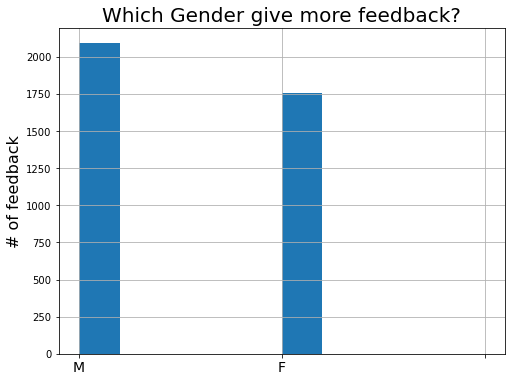

In [76]:
plt.figure(figsize=(8,6))
df_clean.Sex.hist(xlabelsize=14)
plt.title('Which Gender give more feedback?', fontsize=20)
plt.ylabel('# of feedback', fontsize=16)
plt.show()

## Distribution of Classes by Year

plt.figure(figsize=(8,6))
df_clean.Fb_Year.hist(xlabelsize=14)
plt.title('Which Fb_Year give more feedback?', fontsize=20)
plt.ylabel('# of feedback', fontsize=16)
plt.show()

## Distribution of Classes by Edu_Level

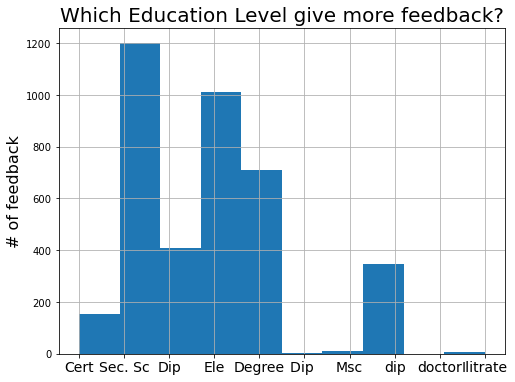

In [77]:
plt.figure(figsize=(8,6))
df_clean.Edu_Level.hist(xlabelsize=14)
plt.title('Which Education Level give more feedback?', fontsize=20)
plt.ylabel('# of feedback', fontsize=16)
plt.show()

## Distribution of Classes by Region

In [79]:
## Distribution of Classes by category

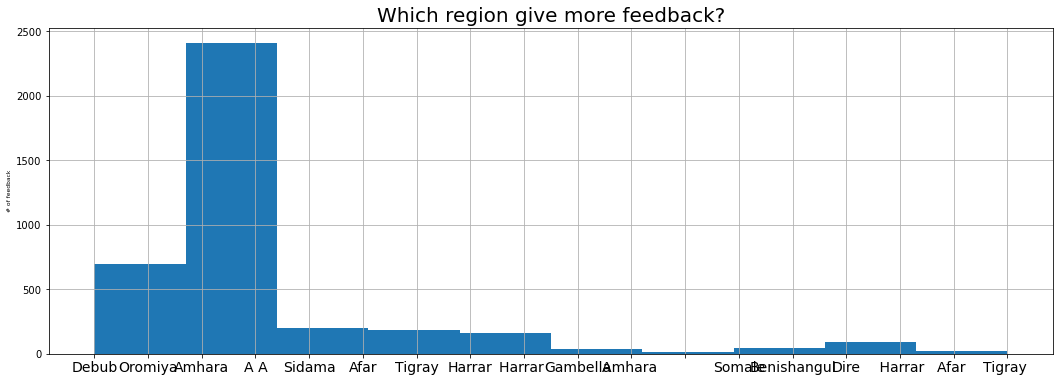

In [89]:
plt.figure(figsize=(18,6))
df_clean.Region.hist(xlabelsize=14)
plt.title('Which region give more feedback?', fontsize=20)
plt.ylabel('# of feedback', fontsize=6)
plt.show()

## How long are the feedback?

In [81]:
df_clean['Feedback_len'] = df_clean.Feedback.apply(len)

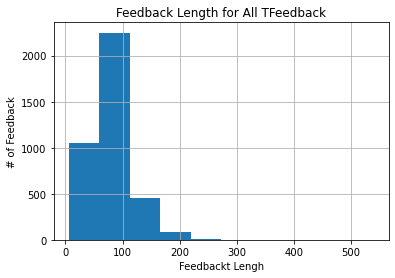

In [82]:
df_clean.Feedback_len.hist()
plt.title('Feedback Length for All TFeedback')
plt.xlabel('Feedbackt Lengh')
plt.ylabel('# of Feedback')
plt.show()

In [83]:
pd.set_option('display.max_colwidth', None)

In [84]:
df_clean[df_clean.Feedback_len > 140].head()

,Region,Sex,Age,Edu_Level,Feedback,Fb_Day,Fb_Month,Fb_Year,Feedback_len
16,Amhara,F,48,Ele,ኢቲቪ. የህዝብ ሚዲያ እንደመሆኑ ቢሰራልን የምንለው አቢሲኒያ ባንክ በኤዔጀንሲ ተቀጥረን የምንሰራ በተለያዩ ቅርንጫፎች 300 የምንሆን የደሞዝ፣የጡረታ፣ጥቅማጥቅም እና ማን እንደሆነ የቀጠረን ኤዔጀንሲ ማወቅ አልቻልንም መብታችን A A ከሚገኝው ዋና ቢሮ ጠይቁልን፡፡ 0920794036 ወ/አብዱ ሽበሽ,1,1,2008.0,188
28,A A,M,58,Degree,መንግስት መግለፅ ያልፍለገው ኢቲቪ መስራት ያስራት ያልቻለው ሱዳን 90 ኪሎ ሜትር ገብታ 1 ቢሊዮን ንብረት እና 1800 ሰዎች ተፈናቅዋል በጀርመን ሚዲያ የሰማነው ይህንን ለህዝቡ በግልፅ ማሳቅና መዘገብ አለባችሁ ቢታረም ጥሩ ነው፡፡,1,1,2008.0,146
49,Amhara,M,50,Ele,በራያ ቆቦ ላይ ችግር አለ ወሎ ውስጥ አራት ቋንቋ አለ ከበፊት ጀምሮ አብረን ነው የምንኖረው አሁን ግን አንዱ ፓርቲ ኦዖሮሞ ነው ላል አንዱ ደግሞ Amhara ነው ይላል ይህን እግር መንግስት ወሎ ክፍለሀገር ተብሎ እንዲቀጥል ህዝቡን በማነጋገር ሰላም ቢፈጥር ጦርነት ይብቃን አሳስቡልን ኢቲቪ ህዝቡን አወያዩ፡፡,1,1,2008.0,195
58,A A,M,58,Degree,ጠ/ሚ አሁን ለAmhara ጥላቻ እንዳለባቸው የሚያሳየው ልዩ ሀይሉ ከመከላከያ እኩል ተዋግቶ Mekele ጀነራሎቸን ሲሰበስቡና በተወካዮች ምክር ቤት ስመሰጋገኑ የAmharaን ልዩ ሀይል አላነሱም ይህ ምንያሳያል ኢቲቪ ይህን ሀሳብ አስተላልፉልን፡፡,1,1,2008.0,154
59,A A,M,58,Ele,ም/ወለጋ ላይ መከላከያን አስወጡ ኔቶርክ አቋረጡ ከዛ የAmhara ብሄር አስጨፈጨፉ ኔቶርክ በማ ቁጥጥር ስር ነው ዌስ መንግስት አገሪቱን የመጠበቅ መረጃ የለውም አይታመንም ህዝብ እየታዘባቸው ነው ኢቲቪ ነፃ የሆነ ሚዲያ አይደለም እውነቱን አትዘግቡም ግን እናሳውቃችሁ ብልን ነው፡፡,1,1,2008.0,177


In [85]:
df_clean[df_clean.Feedback_len == 171]

,Region,Sex,Age,Edu_Level,Feedback,Fb_Day,Fb_Month,Fb_Year,Feedback_len
108,A A,M,73,Dip,የመንገድ ፈንድ ክፍያ ለመክፈል ትኬት የለንም ብለው ፖስታቤት ላኩን ፖስታቤት 5 ሺህ ሰው በላይ ተሰልፎ እየተገላታ ነው ትኬት የለንም ብለው ቀኑ የተወሰነ ነው ከላፈ ወይም ቀድሞ አይከፈልም አሁን ቅጣት ለመቅጣት ነው ኢቲቪ መቶ የሚመለከተውን ቢጤቅልን፡፡ 0911489756,1,1,2008.0,171
1341,Oromiya,M,49,Ele,የኢሀDegree መንግስት ነጋዴውን ፣የቤት አካራዮችን የግል ትምህርት ቤቶችን ምንም አይቆጣጠርም እየሰራ ያለው ከድሀ ህዝብ ጋር ሳይሆን ከሀብታም ጋር ነው ይህ ደግሞ ድሀውን ህዝብ እየጎዳ ነው ለመንግስት ችግር እንደሚፈጥር ነው ኢቢሲ አሳውቁልን ችግር ከመፈጠሩ በፊት፡፡,9,3,2011.0,171
1982,Debub,F,22,Cert,ረቡእ እና እሁድ 3፡30 በብሄራዊ ሬድዮ በፖፕሌሽን ሚዲያ ሴንተር የሚተላለፈው የብርሀን አጥናፍ የሚለው ድራማ አስተማሪና አዝናኝ ነው፡፡ለምሳሌ፡-ለወጣቶች አልባሌ ቦታ መዋል እንደሌለባቸው፣ ከሱስ መጠበቅ እንዳለባቸውና እንድሁም ስለ ሙስና የተለያዩ ግንዛቤዎችን ይሰጣል፡፡,13,3,2012.0,171


In [86]:
df[df['Feedback'] == 0].head(10)

,Region,Sex,Age,Edu_Level,Feedback,Fb_Day,Fb_Month,Fb_Year
id,,,,,,,,


In [87]:
df_clean.head()

,Region,Sex,Age,Edu_Level,Feedback,Fb_Day,Fb_Month,Fb_Year,Feedback_len
0,Debub,M,50,Cert,ኢቲቪ ሰራተኞች በሙሉ እንኳን ለገና በአል በሰላም አደረሳችሁ፡፡,1,1,2008.0,40
1,Debub,M,50,Cert,መንግስት በአገራችን በደረሰው የተለያዩ ችግሮች ላይ እየወሰደ ያለው እርምጃ በጣም ጥሩ ነው በዚሁ ይቀጥል፡፡,1,1,2008.0,68
2,Debub,M,50,Cert,ኢቲቪ ደግሞ በዜና በወቅታዊ ጉዳዮች ላይ እውነት ለመናገር በጣም ጥሩ እየሰራችሁ ነው በርቱ፡፡,1,1,2008.0,59
3,Debub,M,50,Cert,ኢቲቪ ቢሰራ የምንለው ህዝቡ ስሩን የሰደደው የህዋት አስተዳደር አሁንም ባሉት አመራሮች እየተተገበረ ስለሆነ ወደታች ወርዳችሁ ብትሰሩ የበለጠ ተሰሚ ትሆናለችሁ አገርንም በሰላም ታስቀጥላላችሁ ሀላፊነታችሁን ተወጡ፡፡,1,1,2008.0,134
4,Debub,M,30,Sec. Sc,ኢቲቪ ዜና 57 ላይ የሚቀርቡት ወቅታዊ ዜናዎች በሀገርና በውጭ በጣም ጥሩ መረጃ እያገኝን ነው፡፡,1,1,2008.0,61
